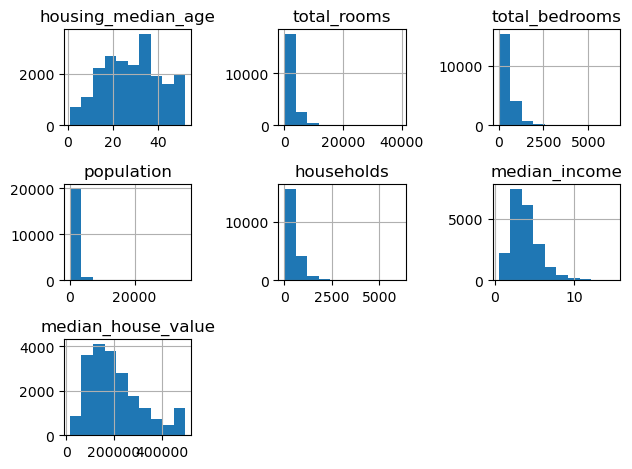

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
 
housing.iloc[:, 2:].select_dtypes("number").hist()
plt.tight_layout()
plt.show()

In [16]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = housing.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


In [29]:
housing['ocean_proximity'].astype("category")

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: category
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [27]:
housing.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [30]:
import tensorflow as tf

y = housing["median_house_value"].to_numpy()

x_num = housing.select_dtypes("number").drop("median_house_value", axis=1).to_numpy()
x_cat = housing['ocean_proximity'].to_numpy()


# Cat pipeline
lookup = tf.keras.layers.StringLookup(vocabulary=['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], output_mode='int')
encode_cat_layer = tf.keras.layers.CategoryEncoding(
    num_tokens=lookup.vocabulary_size(), output_mode="one_hot")

# Num pipeline
norm_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(4, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(4, activation='relu')
output_layer = tf.keras.layers.Dense(1)

num_inputs = tf.keras.Input(shape=(x_num.shape[1],), name="numeric_features")
cat_inputs = tf.keras.Input(shape=(x_cat.shape[1],), name="categorical_features")

norm_layer_num = norm_layer(num_inputs)
enc_layer_cat = encode_cat_layer(cat_inputs)

concat = tf.keras.layers.concatenate([enc_layer_cat, norm_layer_num])
h1 = hidden_layer1(concat)
h2 = hidden_layer2(h1)
output = output_layer(h2)

model = tf.keras.Model(inputs=[num_inputs, cat_inputs], outputs=[output_layer])



IndexError: tuple index out of range

In [31]:
import tensorflow as tf

# Extract target and features
y = housing["median_house_value"].to_numpy()

# Extract numerical and categorical features
x_num = housing.select_dtypes("number").drop("median_house_value", axis=1).to_numpy()
x_cat = housing['ocean_proximity'].to_numpy().reshape(-1, 1)

# Cat pipeline
lookup = tf.keras.layers.StringLookup(vocabulary=['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], output_mode='int')
encode_cat_layer = tf.keras.layers.CategoryEncoding(
    num_tokens=lookup.vocabulary_size(), output_mode="one_hot")

# Num pipeline
norm_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(4, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(4, activation='relu')
output_layer = tf.keras.layers.Dense(1)

# Define inputs
num_inputs = tf.keras.Input(shape=(x_num.shape[1],), name="numeric_features")
cat_inputs = tf.keras.Input(shape=(1,), name="categorical_features")

# Apply transformations
norm_layer_num = norm_layer(num_inputs)
encoded_cat = encode_cat_layer(lookup(cat_inputs))

# Concatenate and build model
concat = tf.keras.layers.concatenate([encoded_cat, norm_layer_num])
h1 = hidden_layer1(concat)
h2 = hidden_layer2(h1)
output = output_layer(h2)

model = tf.keras.Model(inputs=[num_inputs, cat_inputs], outputs=[output])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ categorical_featur… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_1     │ (None, 1)         │          0 │ categorical_feat… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_features    │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_encoding_1 │ (None, 6)         │          0 │ string_lookup_1[… │
│ (CategoryEncoding)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 8)         │         17 │ numeric_features… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 14)        │          0 │ category_encodin… │
│ (Concatenate)       │                   │            │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 4)         │         60 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 4)         │         20 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │          5 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102 (412.00 B)

 Trainable params: 85 (340.00 B)

 Non-trainable params: 17 (72.00 B)

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit([x_num, x_cat], y, epochs=20, validation_split=0.2)

Epoch 1/20


ValueError: Exception encountered when calling Concatenate.call().

[1mShape must be rank 3 but is rank 2 for '{{node functional_1_1/concatenate_1/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](functional_1_1/category_encoding_1_1/one_hot, functional_1_1/normalization_2_1/truediv, functional_1_1/concatenate_1/concat/axis)' with input shapes: [32,1,6], [32,8], [].[0m

Arguments received by Concatenate.call():
  • inputs=['tf.Tensor(shape=(32, 1, 6), dtype=float32)', 'tf.Tensor(shape=(32, 8), dtype=float32)']